In [5]:
!pip install bayesian-optimization

In [6]:
!pip install optuna


In [7]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [9]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [10]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [11]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [12]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [13]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [14]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [15]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [16]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [17]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [18]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [19]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [20]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 3 1]


In [21]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [22]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [23]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2


In [24]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
7826,1,0,2,1,2,2,2,2,1,3
2541,3,1,1,2,1,1,1,1,2,2
2620,1,3,1,2,1,1,1,1,3,2
9484,3,1,3,3,2,2,2,2,2,4
8912,2,1,3,1,2,2,2,2,2,4
9189,2,1,3,1,2,2,2,2,2,4
8400,1,0,2,1,2,2,2,2,1,3
5596,3,2,1,1,2,1,1,1,2,2
5686,4,2,1,2,1,1,1,1,2,2
11404,4,2,5,4,2,2,2,2,3,6


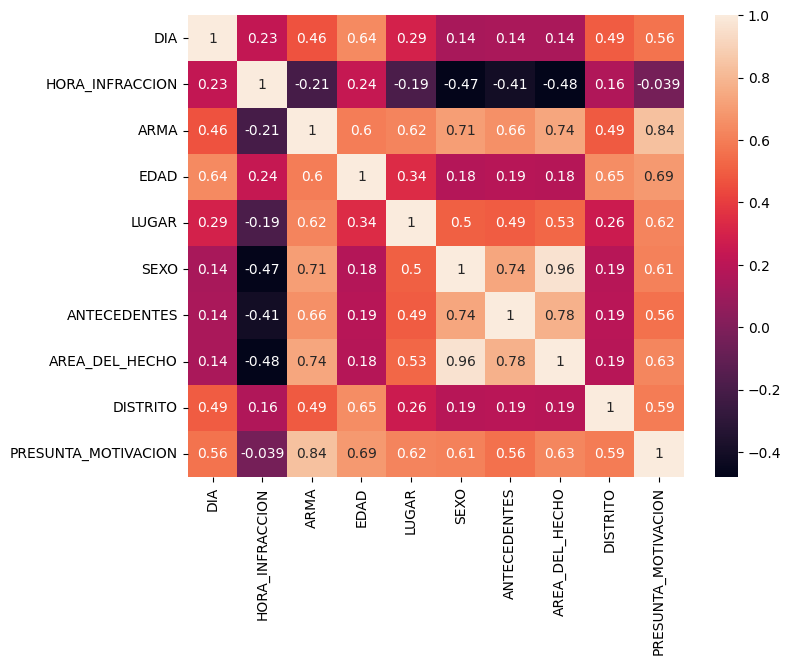

In [25]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [26]:

X = df.iloc[:, [4,8,0,2,3,5,6,9,1]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[7]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,LUGAR,DISTRITO,DIA,ARMA,EDAD,SEXO,ANTECEDENTES,PRESUNTA_MOTIVACION,HORA_INFRACCION
0,1,2,3,1,1,1,1,1,0
1,1,1,3,2,2,1,1,2,2
2,2,1,2,2,2,1,1,2,0
3,1,3,4,1,3,1,1,1,2
4,1,1,3,1,2,1,1,2,3


In [27]:

#presentacion de los atributos de destino
Y.head()

,AREA_DEL_HECHO
0,1
1,1
2,1
3,1
4,1


In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [29]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LUGAR                9414 non-null   int64
 1   DISTRITO             9414 non-null   int64
 2   DIA                  9414 non-null   int64
 3   ARMA                 9414 non-null   int64
 4   EDAD                 9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   ANTECEDENTES         9414 non-null   int64
 7   PRESUNTA_MOTIVACION  9414 non-null   int64
 8   HORA_INFRACCION      9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [30]:
import optuna
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Función para evaluar el modelo SVM con diferentes kernels, parámetros C y decision_function_shape
def svm_evaluate(trial):
    # Sugerir un valor para el parámetro C entre 1 y 100
    C = trial.suggest_float('C', 1, 100)

    # Sugerir el tipo de kernel como un valor categórico
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    # Sugerir la estrategia 'ovo' (uno contra uno) o 'ovr' (uno contra todos)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])

    # Crear el clasificador SVM con los parámetros sugeridos
    svc = SVC(C=C, kernel=kernel, decision_function_shape=decision_function_shape, random_state=7)

    # Ajustar el modelo con los datos de entrenamiento
    svc.fit(X_train, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = svc.predict(X_test)

    # Retornar el precision_score como métrica a optimizar
    return precision_score(y_test, y_pred, average='micro')

# Definir el estudio de Optuna para maximizar la precisión
study = optuna.create_study(direction='maximize')

# Ejecutar la optimización (n_trials = número de intentos)
study.optimize(svm_evaluate, n_trials=25)

# Obtener los mejores parámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener la mejor precisión alcanzada
best_precision = study.best_value
print(f"La mejor precisión alcanzada es: {best_precision * 100:.2f}%")



[I 2024-12-03 15:04:03,254] A new study created in memory with name: no-name-416ba29b-695f-4b47-a150-526ec9c287f2
[I 2024-12-03 15:04:11,149] Trial 0 finished with value: 0.41928632115548004 and parameters: {'C': 55.50582442385451, 'kernel': 'sigmoid', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.41928632115548004.
[I 2024-12-03 15:04:16,039] Trial 1 finished with value: 0.41928632115548004 and parameters: {'C': 53.90391722082715, 'kernel': 'sigmoid', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.41928632115548004.
[I 2024-12-03 15:04:16,505] Trial 2 finished with value: 0.9855564995751912 and parameters: {'C': 29.412119225648098, 'kernel': 'rbf', 'decision_function_shape': 'ovr'}. Best is trial 2 with value: 0.9855564995751912.
[I 2024-12-03 15:04:16,893] Trial 3 finished with value: 0.9851316907391674 and parameters: {'C': 92.01074626368475, 'kernel': 'rbf', 'decision_function_shape': 'ovo'}. Best is trial 2 with value: 0.9855564995751912.
[I 20

Mejores hiperparámetros encontrados: {'C': 11.9879863850263, 'kernel': 'poly', 'decision_function_shape': 'ovo'}
La mejor precisión alcanzada es: 98.68%


In [46]:
# Cargamos la librería Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Llamamos al constructor de Support Vector Machine
classifier = SVC(kernel='poly', C=11.98, decision_function_shape='ovo')

# Entrenamos el modelo
svm_modelo = classifier.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_area_hecho_p1.xlsx")

              precision    recall  f1-score      support
1              0.980191  0.997015  0.988531  1340.000000
2              0.995964  0.973373  0.984539  1014.000000
accuracy       0.986831  0.986831  0.986831     0.986831
macro avg      0.988077  0.985194  0.986535  2354.000000
weighted avg   0.986985  0.986831  0.986811  2354.000000


In [48]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.980191
1             2   0.995964
2     macro avg   0.988077
3  weighted avg   0.986985


In [49]:

y_test.head()

,AREA_DEL_HECHO
0,1
1,2
2,1
3,1
4,1


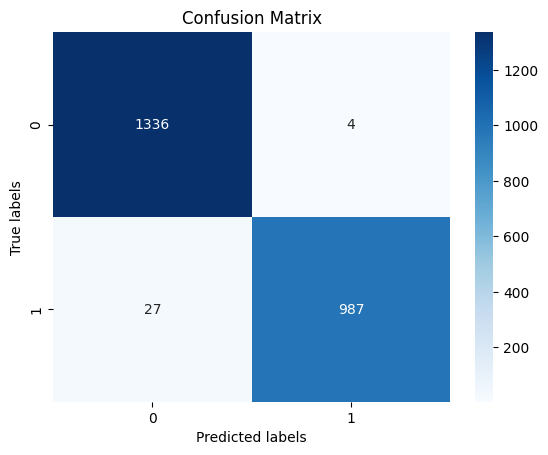

In [50]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [51]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_area_hecho.xlsx")

      0    1
0  1336    4
1    27  987


In [52]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['area_hecho_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,area_hecho_prediccion,AREA_DEL_HECHO
0,1,1
1,2,2
2,1,1
3,1,1
4,1,1
5,2,2
6,2,2
7,1,1
8,2,2
9,1,1


In [53]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada_svm(svm_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)



In [54]:
v_cruzada_svm(svm_modelo, X_train, y_train)

Iteraciones validación cruzada (Precisión):
 [0.98725438 0.98566118 0.97928837 0.98778545 0.98565356]
Precisión media:
 0.985129 (0.003041)
Iteraciones validación cruzada (Accuracy):
 [0.98725438 0.98566118 0.97928837 0.98778545 0.98565356]
Accuracy media:
 0.985129 (0.003041)
Iteraciones validación cruzada (Recall):
 [0.98725438 0.98566118 0.97928837 0.98778545 0.98565356]
Recall media:
 0.985129 (0.003041)


In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  98.68309260832625
Accuracy:  98.68309260832625
Recall:  98.68309260832625


In [56]:
df_combined['AREA_DEL_HECHO'] = df_combined['AREA_DEL_HECHO'].apply(lambda x:
                                                                                                    'Urbano' if x == 1 else
                                                                                                    'Rural')



In [57]:
df_combined['area_hecho_prediccion'] = df_combined['area_hecho_prediccion'].apply(lambda x:
                                                                                                    'Urbano' if x == 1 else
                                                                                                    'Rural')



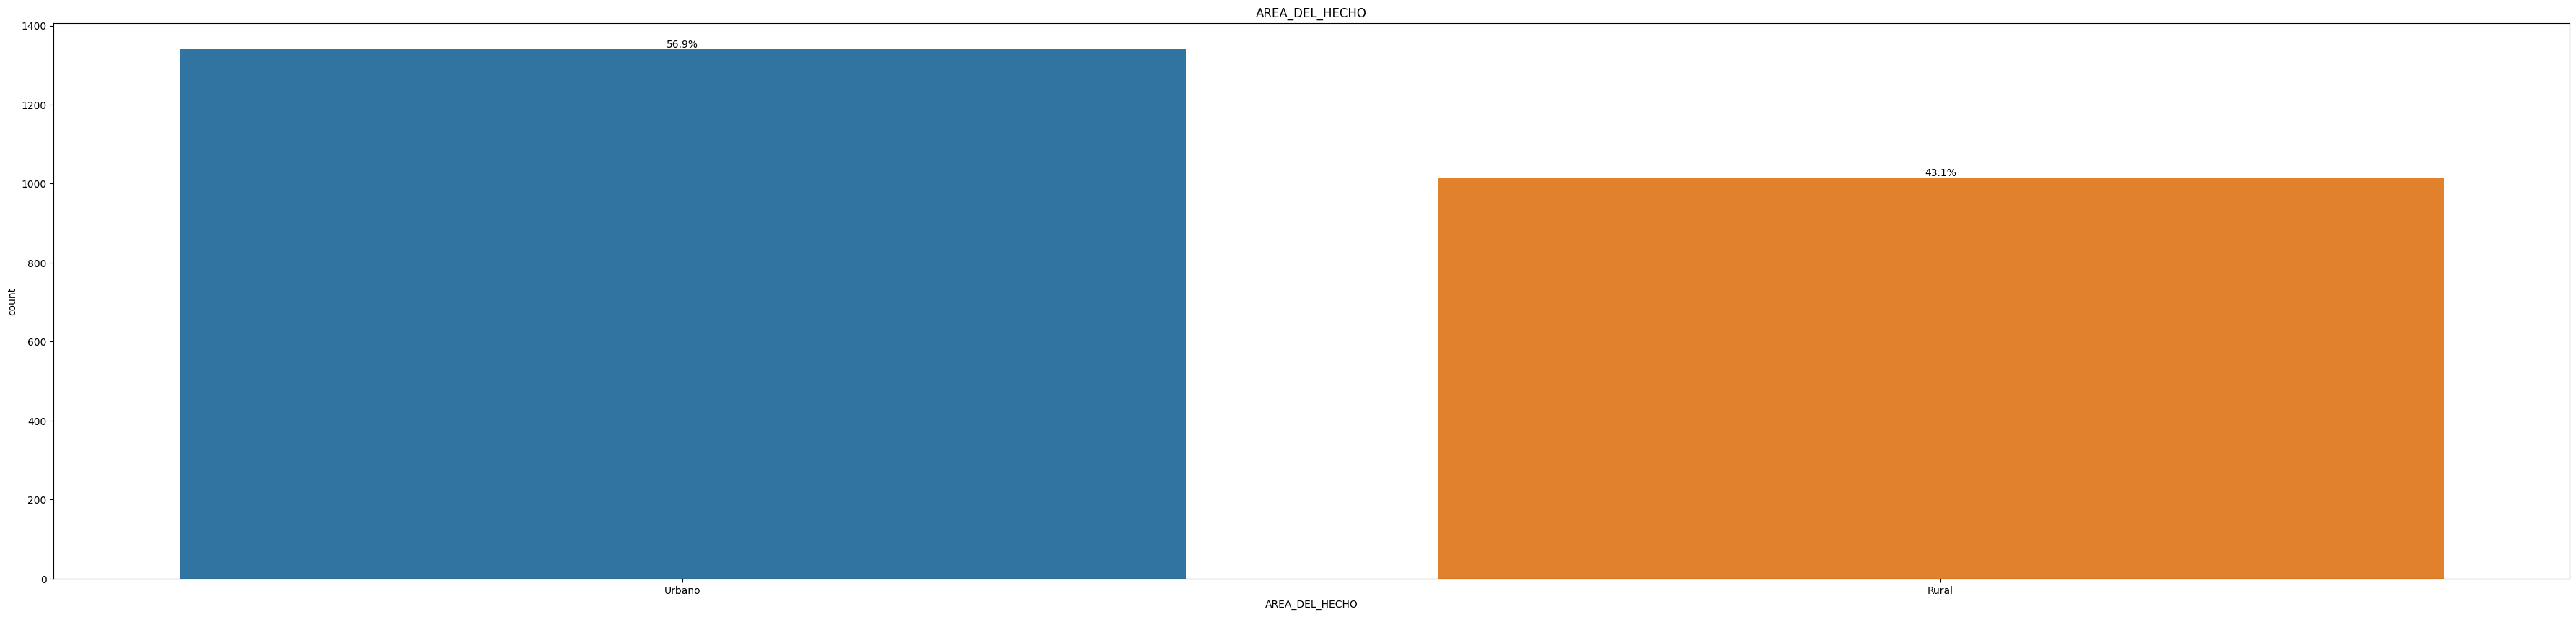

In [58]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='AREA_DEL_HECHO',hue = 'AREA_DEL_HECHO', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('AREA_DEL_HECHO')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_AREA_DEL_HECHO.png")

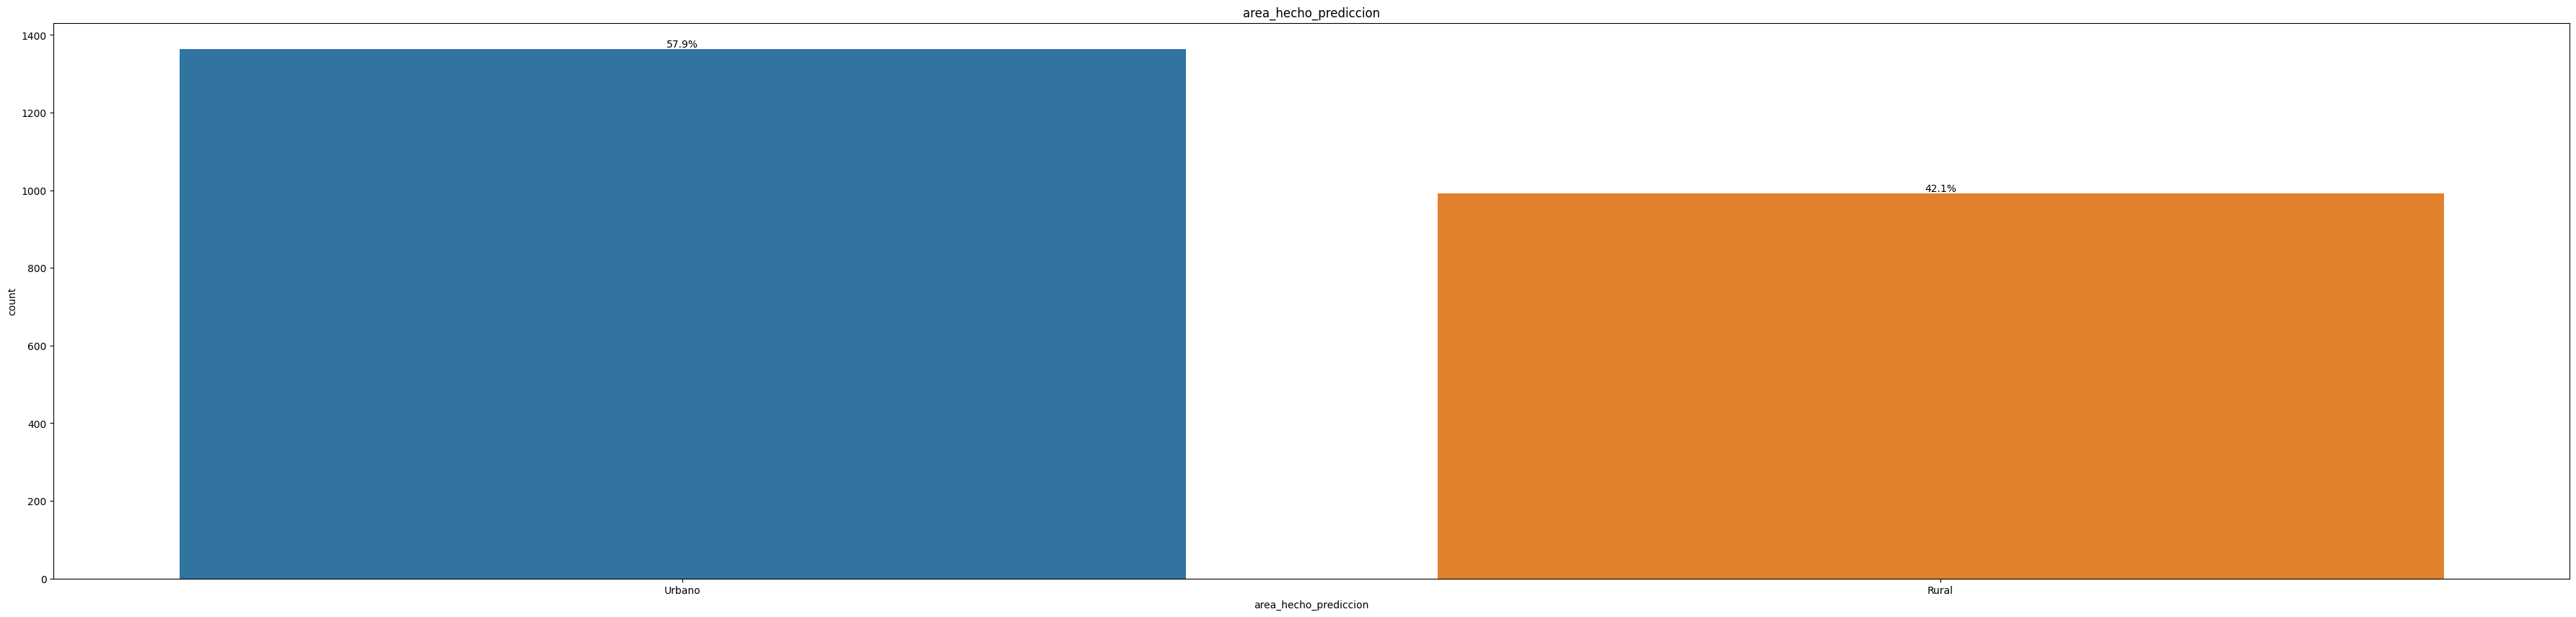

In [59]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='area_hecho_prediccion',hue = 'area_hecho_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('area_hecho_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_area_hecho.png")